In [1]:
#!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import dataset

In [4]:
data = pd.read_csv('forestfires.csv')

In [5]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data.shape

(517, 31)

In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
data[data.duplicated()].shape

(8, 31)

In [11]:
#data[data.duplicated()]

In [12]:
#df = data.drop_duplicates()

In [13]:
#df

In [14]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [15]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


# Data Visualization

<AxesSubplot:>

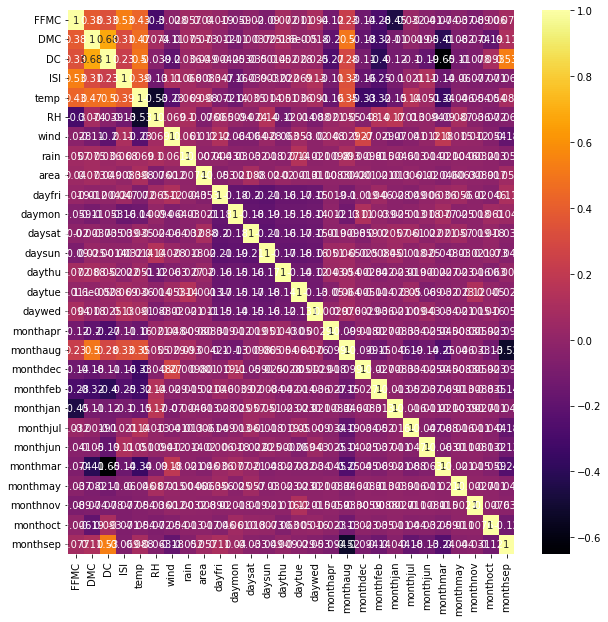

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="inferno")

<AxesSubplot:xlabel='size_category', ylabel='count'>

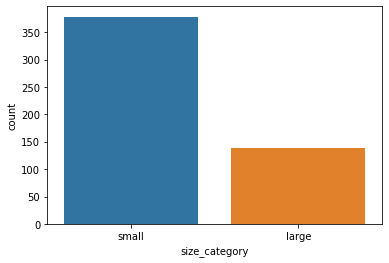

In [17]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

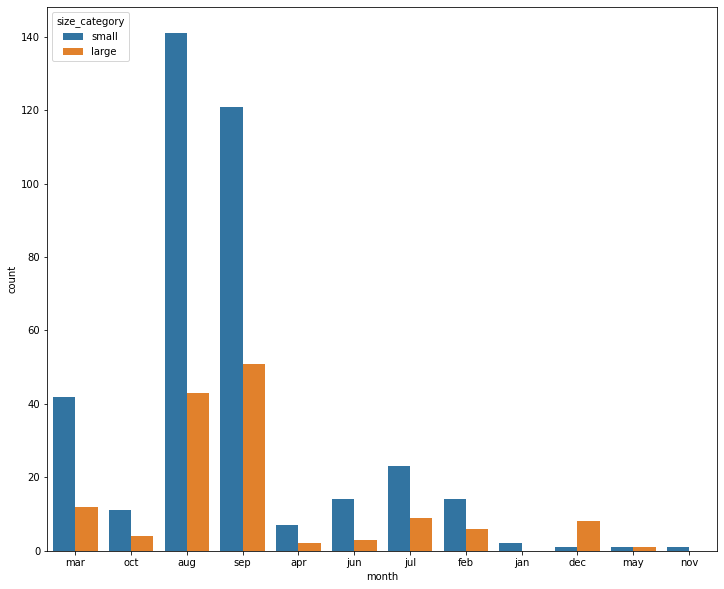

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(x = data['month'],hue=data['size_category'])
plt.show()

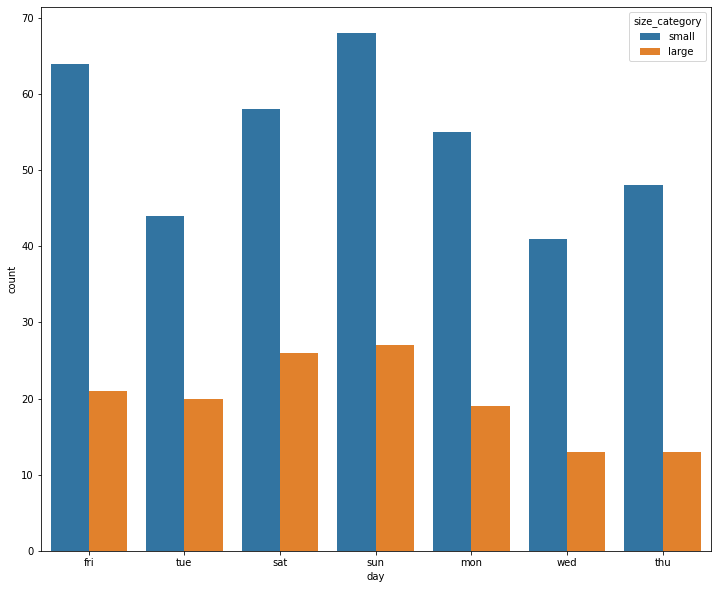

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(x = data['day'],hue=data['size_category'])
plt.show()


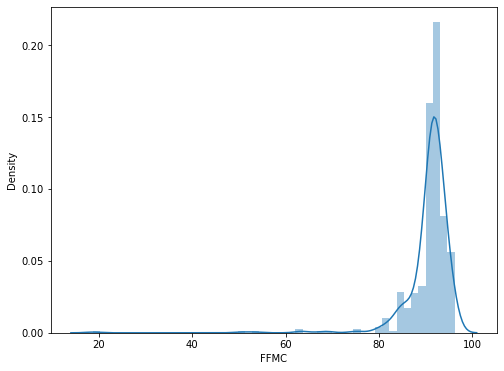

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(data['FFMC'],)
plt.show()

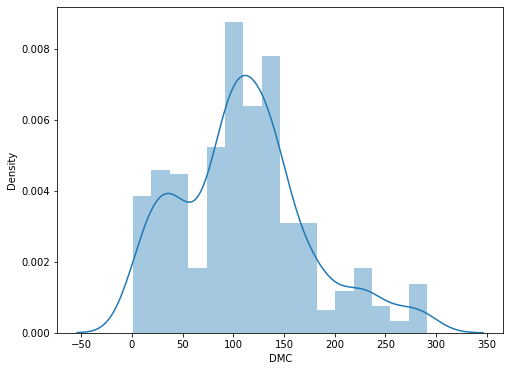

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(data['DMC'],)
plt.show()

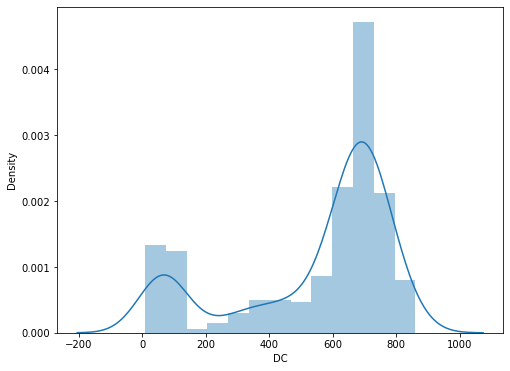

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(data['DC'],)
plt.show()

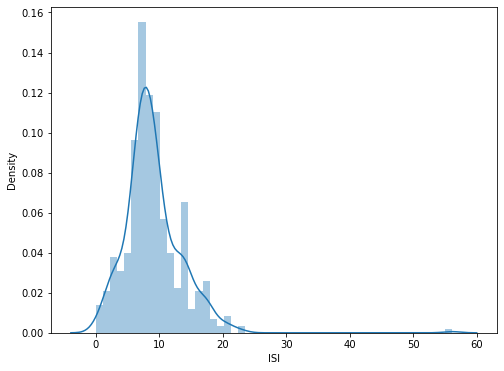

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(data['ISI'],)
plt.show()

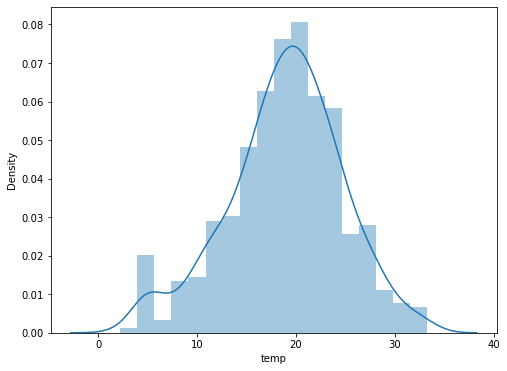

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(data['temp'],)
plt.show()

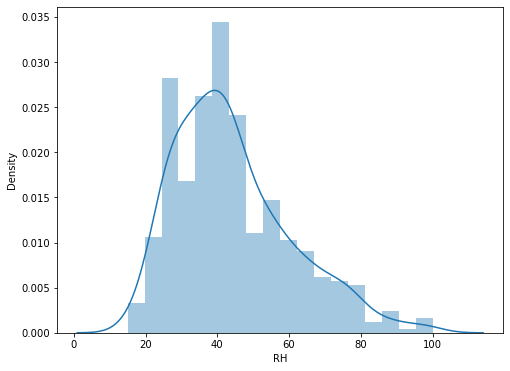

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(data['RH'],)
plt.show()

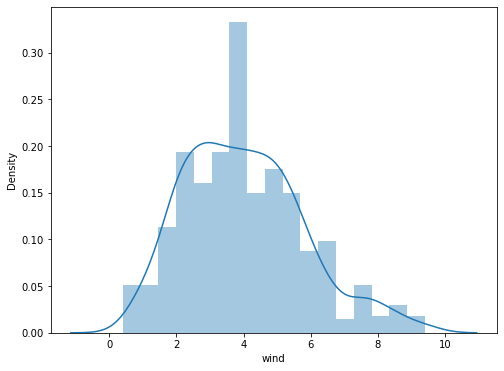

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(data['wind'],)
plt.show()

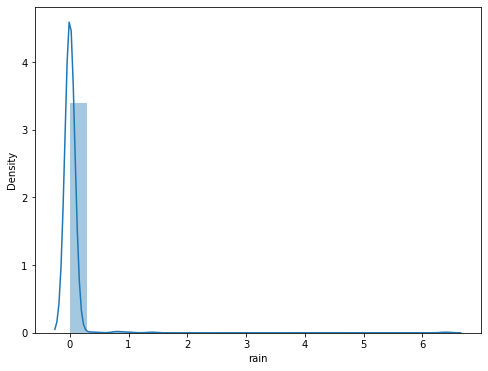

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(data['rain'],)
plt.show()

In [28]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


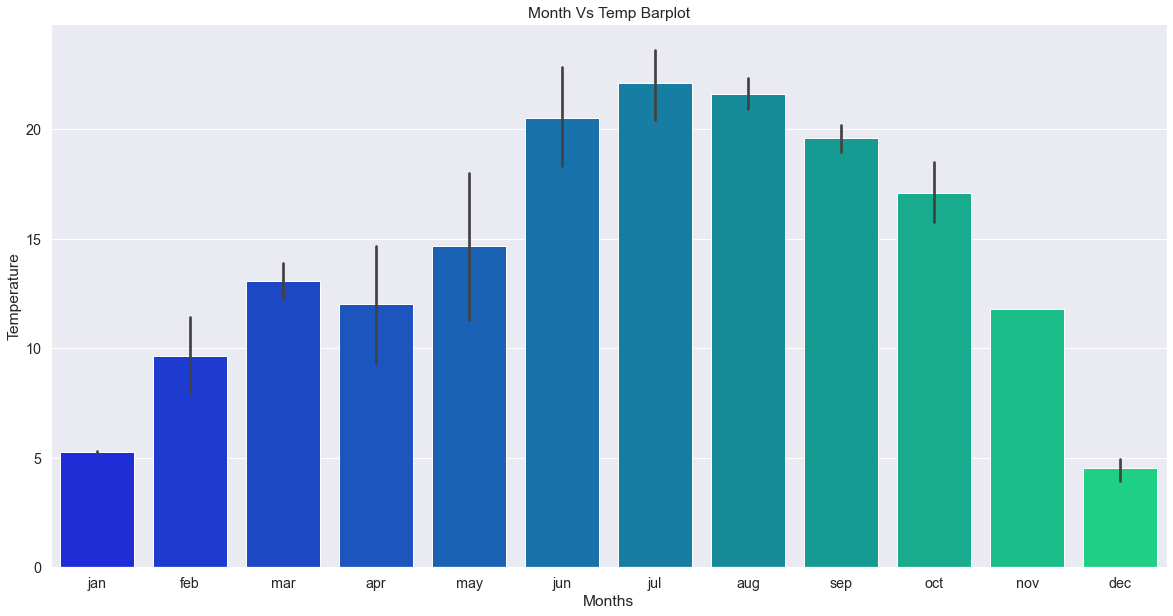

In [29]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

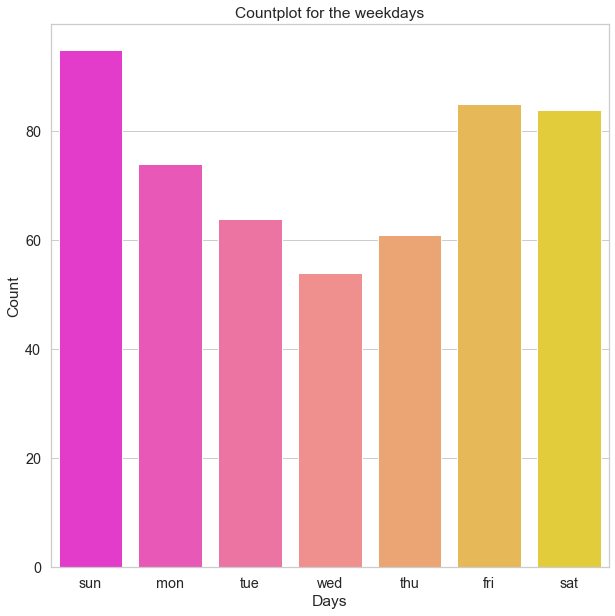

In [30]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

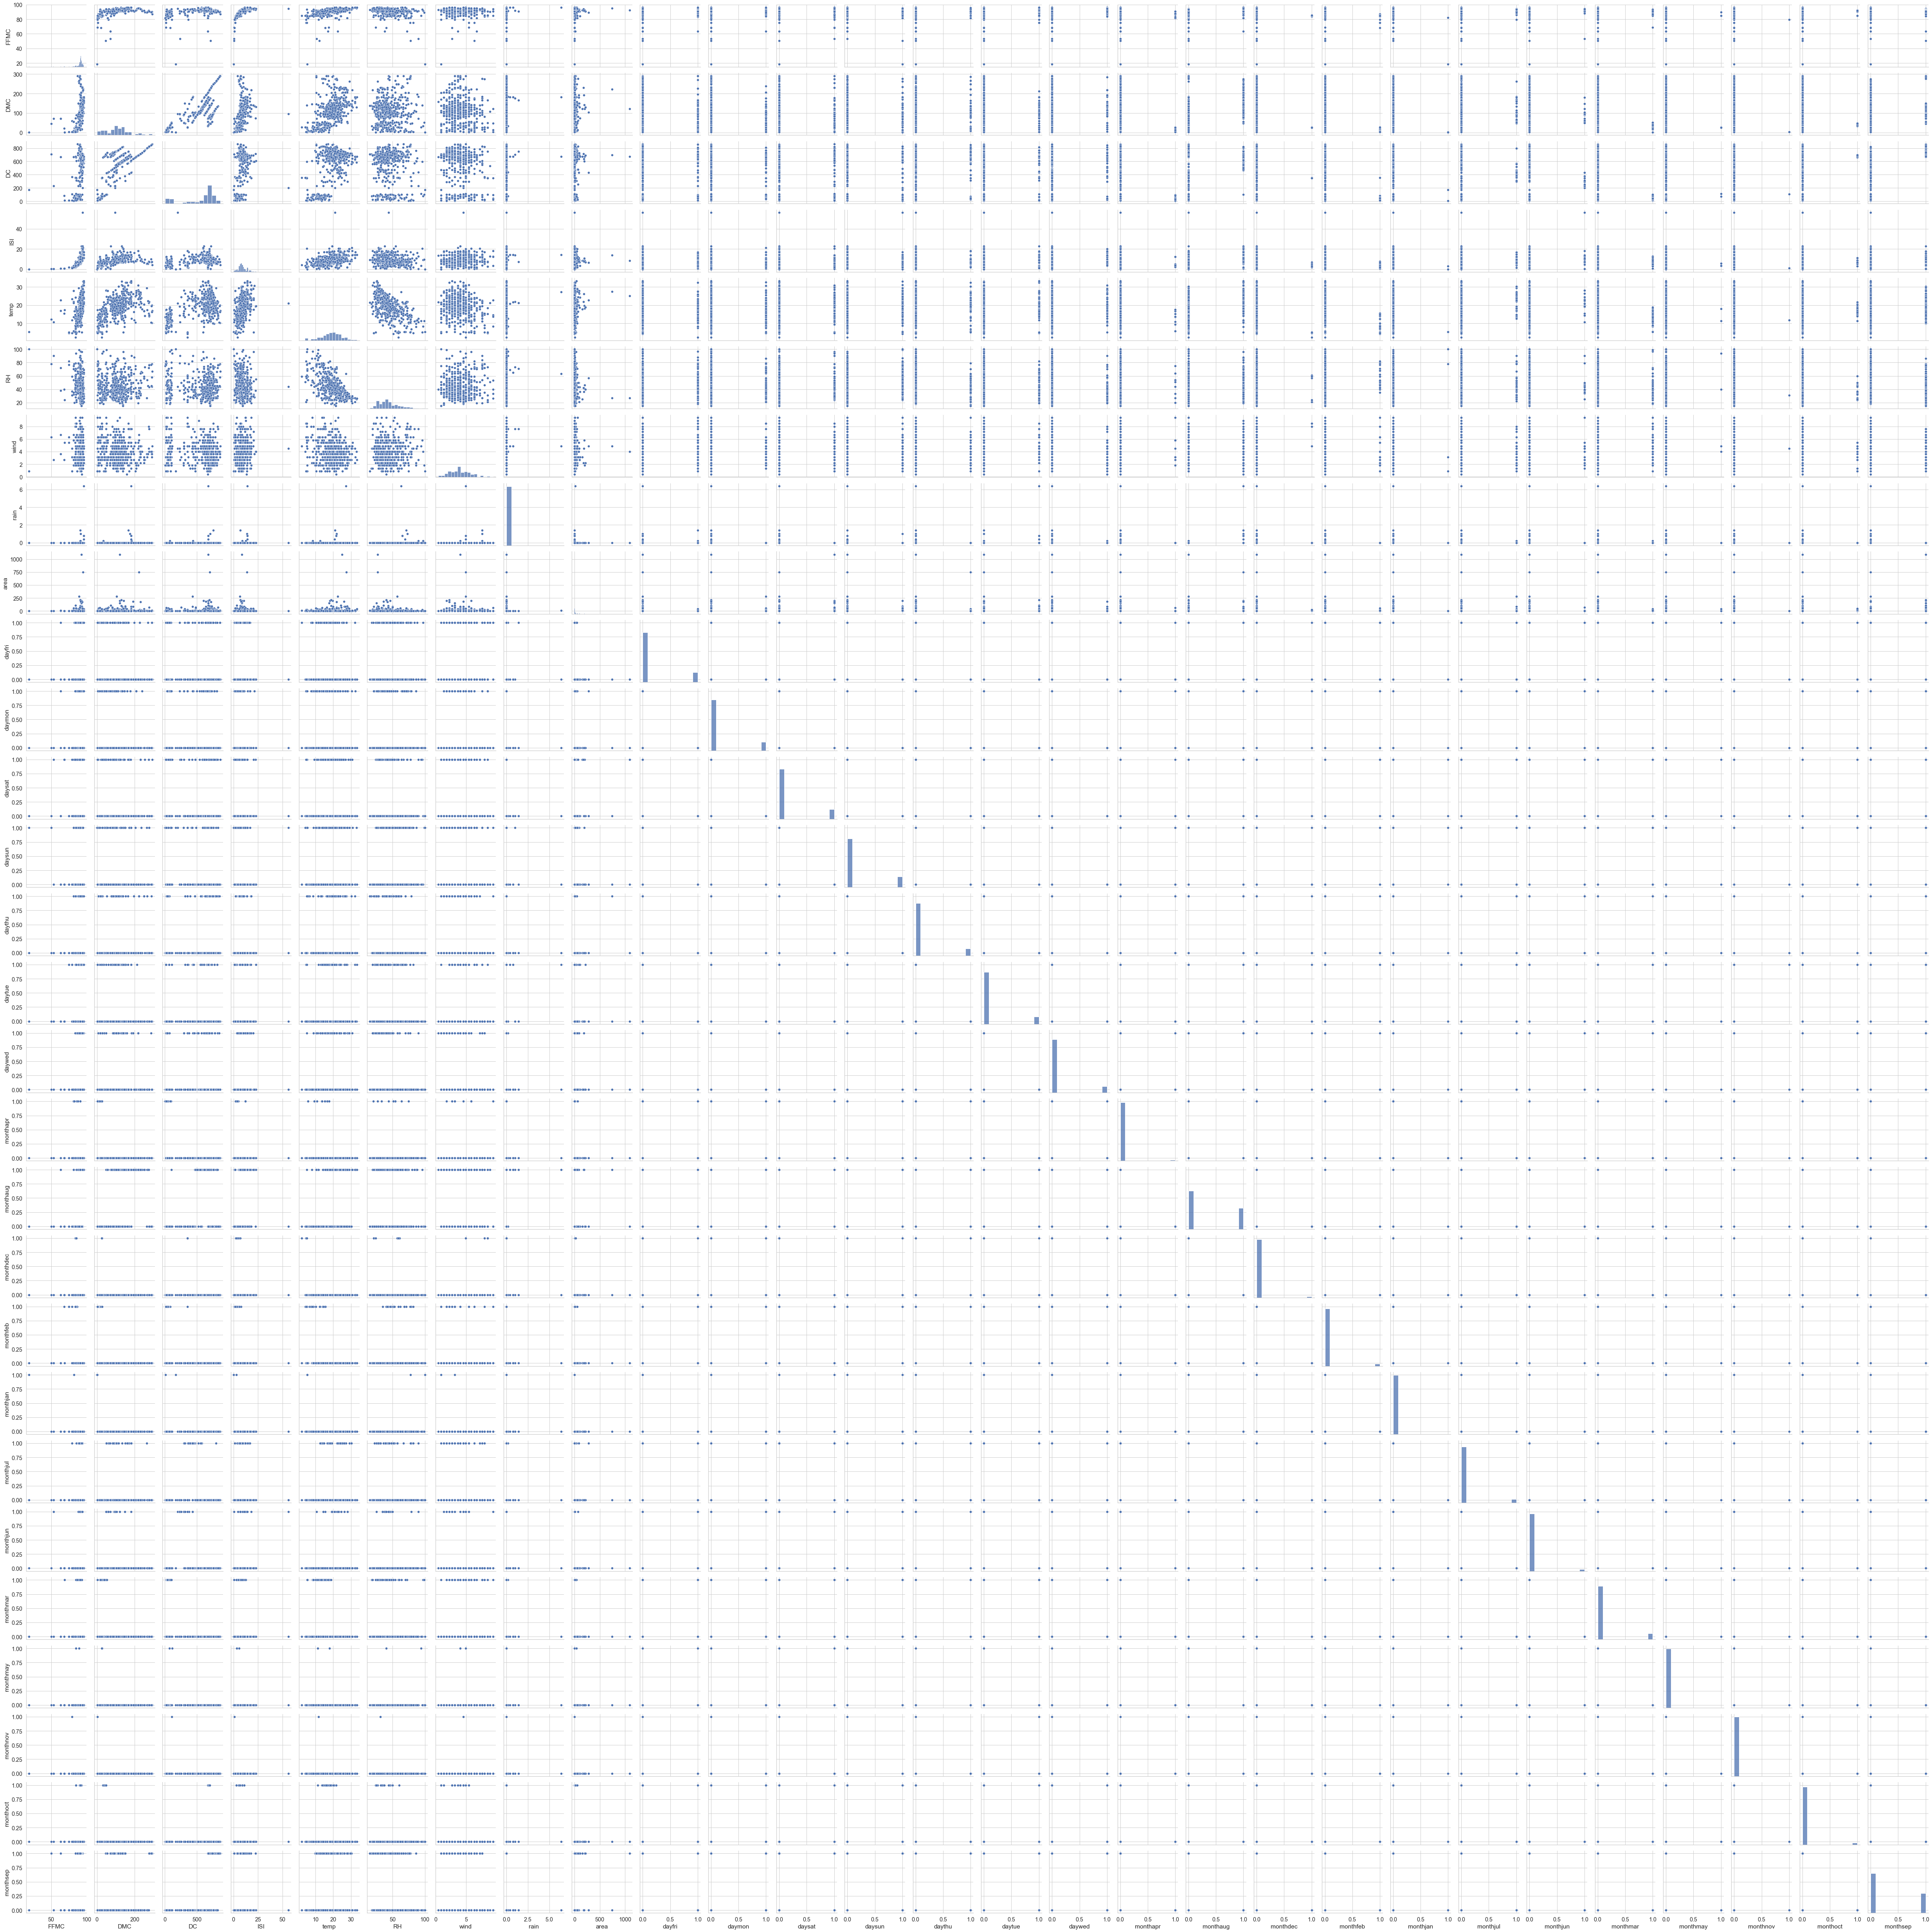

In [31]:
sns.pairplot(data)
plt.show()

In [32]:
categorical_features = data.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


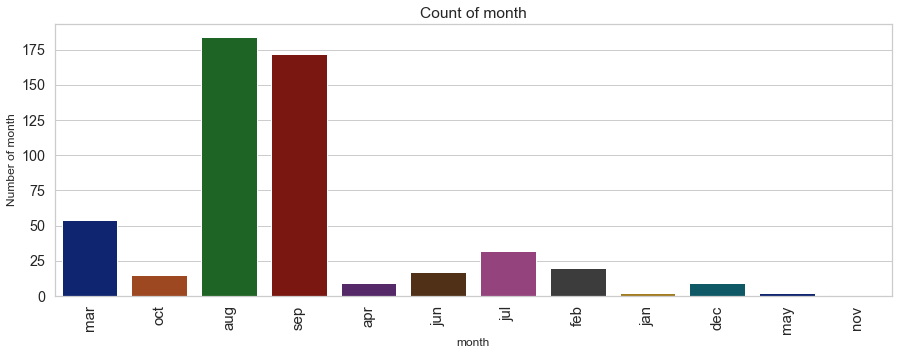

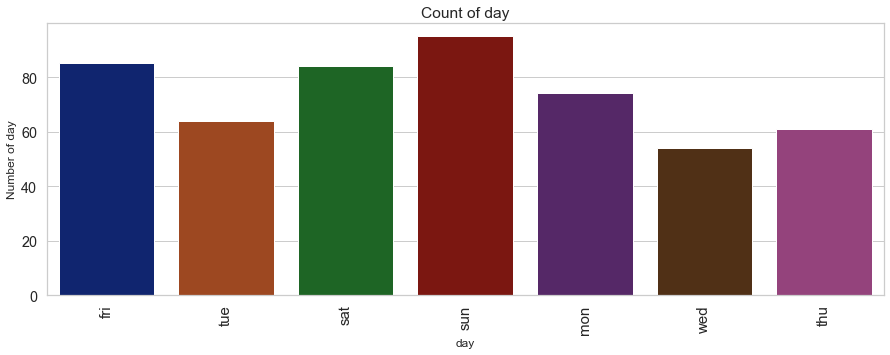

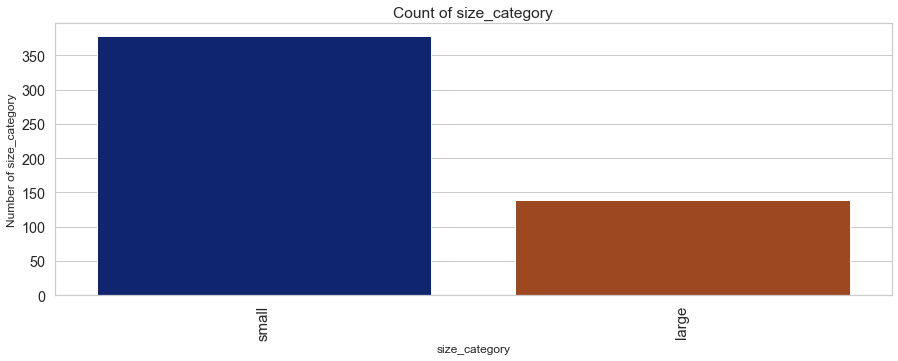

In [34]:
print(categorical_features)



for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    forest = data.copy()
    unique = data[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=data, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

# Model Building

In [35]:
x = data.drop(labels='size_category',axis = 1)
y = data[['size_category']]

In [36]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [38]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [39]:
x_train.shape,y_train.shape

((361, 30), (361, 1))

In [40]:
x_test.shape,y_test.shape

((156, 30), (156, 1))

In [42]:
#scaling the numerical data( leaving the target variable )
df1=data.iloc[:,2:30]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_norm=sc.fit_transform(df1)
df_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

# PCA

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=28)
pca_values=pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  1.23456086e-14, -1.26784270e-15],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02,  3.99273363e-15, -8.49649085e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  4.04274053e-15, -5.89129124e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01,  3.34297554e-16,  3.16544817e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  6.22853913e-16,  6.73810672e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  1.93684019e-16,  7.01530476e-17]])

In [44]:
var=pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 2.50195377e-33])

In [45]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

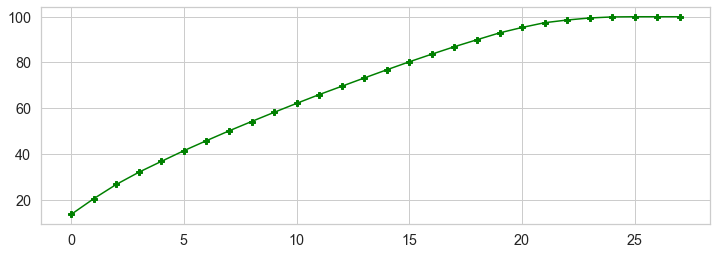

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "P");

hence here we will choose 24 pcs outoff 28 for further procedure

In [48]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                 data[['size_category']]], axis = 1)
finaldf.size_category.replace(('large','small'),(1,0),inplace=True)
finaldf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


<AxesSubplot:>

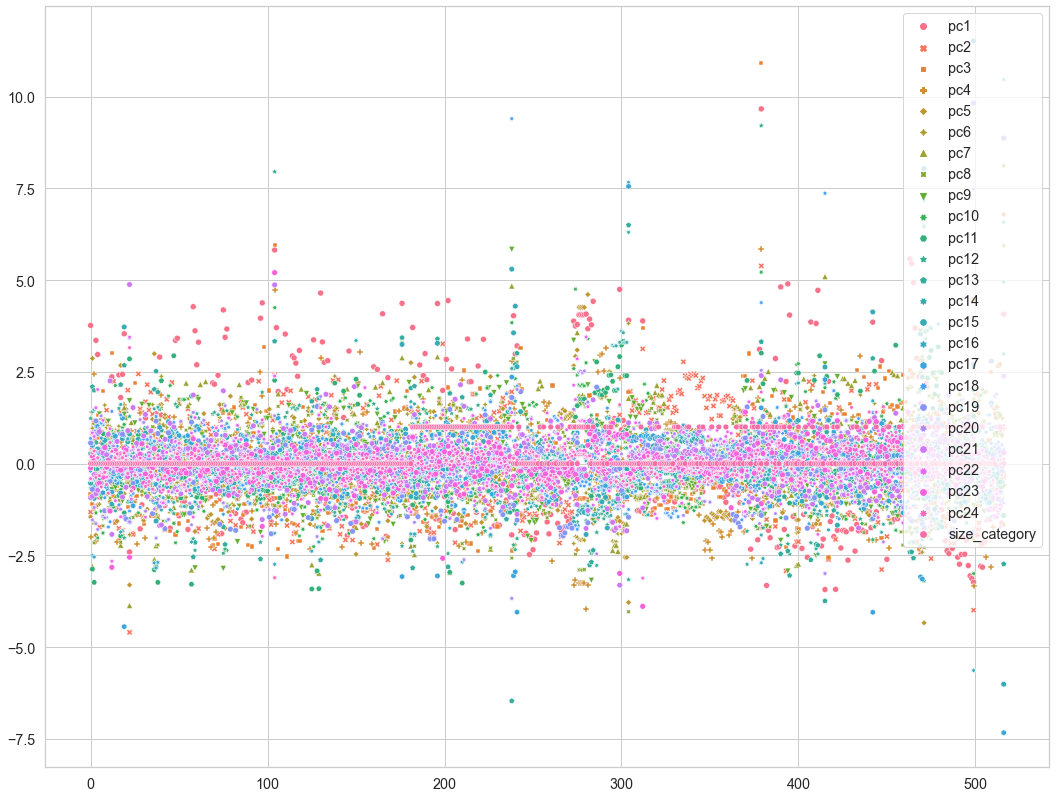

In [49]:
import seaborn as sns
fig=plt.figure(figsize=(18,14))
sns.scatterplot(data=finaldf)

In [50]:
#split the data into x and y
array=finaldf.values
X=array[:,0:24]
Y=array[:,24]

# iteration 1

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [52]:
model=Sequential()
model.add(Dense(12,input_dim=24,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,Y, validation_split=0.3,epochs=150,batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 10ms/step - loss: 0.6276 - accuracy: 0.7008 - val_loss: 0.7078 - val_accuracy: 0.6026
Epoch 2/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5825 - accuracy: 0.7285 - val_loss: 0.7024 - val_accuracy: 0.6154
Epoch 3/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5578 - accuracy: 0.7424 - val_loss: 0.7032 - val_accuracy: 0.6667
Epoch 4/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5408 - accuracy: 0.7535 - val_loss: 0.7052 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7507 - val_loss: 0.7078 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7507 - val_loss: 0.7114 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7590 - val_loss: 0.7166 - val_accuracy: 0.6795
Epoch 8/150


Epoch 59/150
37/37 [==============================] - 0s 4ms/step - loss: 0.1973 - accuracy: 0.9307 - val_loss: 0.8444 - val_accuracy: 0.6731
Epoch 60/150
37/37 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.9280 - val_loss: 0.8455 - val_accuracy: 0.6795
Epoch 61/150
37/37 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.9307 - val_loss: 0.8578 - val_accuracy: 0.6859
Epoch 62/150
37/37 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.9335 - val_loss: 0.8593 - val_accuracy: 0.6731
Epoch 63/150
37/37 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9335 - val_loss: 0.8586 - val_accuracy: 0.6731
Epoch 64/150
37/37 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9474 - val_loss: 0.8646 - val_accuracy: 0.6731
Epoch 65/150
37/37 [==============================] - 0s 5ms/step - loss: 0.1741 - accuracy: 0.9474 - val_loss: 0.8684 - val_accuracy: 0.6859
Epoch 

37/37 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9751 - val_loss: 1.0700 - val_accuracy: 0.7628
Epoch 117/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9723 - val_loss: 1.0716 - val_accuracy: 0.7756
Epoch 118/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9778 - val_loss: 1.0770 - val_accuracy: 0.7756
Epoch 119/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 1.0930 - val_accuracy: 0.7756
Epoch 120/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9806 - val_loss: 1.0982 - val_accuracy: 0.7756
Epoch 121/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9834 - val_loss: 1.1002 - val_accuracy: 0.7756
Epoch 122/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9778 - val_loss: 1.1107 - val_accuracy: 0.7756
Epoch 123/150

In [53]:
#accuracy of model
scores=model.evaluate(X,Y)

17/17 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.9284


In [54]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.84%


# iteration 2

In [55]:
model1=Sequential()
model1.add(Dense(12,input_dim=24,activation='sigmoid'))
model1.add(Dense(8,activation='sigmoid'))
model1.add(Dense(1,activation='relu'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6555 - accuracy: 0.7562 - val_loss: 0.6834 - val_accuracy: 0.6731
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5695 - accuracy: 0.7535 - val_loss: 0.6727 - val_accuracy: 0.6795
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5677 - accuracy: 0.7535 - val_loss: 0.6713 - val_accuracy: 0.6795
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.7562 - val_loss: 0.6677 - val_accuracy: 0.6795
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7562 - val_loss: 0.6682 - val_accuracy: 0.6795
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7562 - val_loss: 0.6634 - val_accuracy: 0.6795
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.7562 - val_loss: 0.6658 - val_accuracy: 0.6731
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.7950 - val_loss: 0.9077 - val_accuracy: 0.6923
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.7950 - val_loss: 0.8175 - val_accuracy: 0.7051
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.7950 - val_loss: 1.0481 - val_accuracy: 0.7051
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.7950 - val_loss: 1.0464 - val_accuracy: 0.7051
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.7978 - val_loss: 0.9658 - val_accuracy: 0.7051
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.7950 - val_loss: 1.0428 - val_accuracy: 0.7051
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.7950 - val_loss: 1.0384 - val_accuracy: 0.7051
Epoch 

In [56]:
#model accuracy
scores1=model1.evaluate(X,Y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8027
accuracy: 80.27%


# iteration 3

In [57]:
model2=Sequential()
model2.add(Dense(12,input_dim=24,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='relu'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(X,Y,epochs=100, validation_split=0.3,batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 3.3992 - accuracy: 0.7562 - val_loss: 4.8019 - val_accuracy: 0.6731
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 3.3518 - accuracy: 0.7562 - val_loss: 4.8742 - val_accuracy: 0.6731
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 3.3144 - accuracy: 0.7562 - val_loss: 4.8734 - val_accuracy: 0.6731
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 3.1979 - accuracy: 0.7562 - val_loss: 4.8718 - val_accuracy: 0.6731
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 3.1849 - accuracy: 0.7562 - val_loss: 4.8719 - val_accuracy: 0.6731
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 3.1830 - accuracy: 0.7562 - val_loss: 4.8710 - val_accuracy: 0.6731
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 3.1812 - accuracy: 0.7562 - val_loss: 4.8710 - val_accuracy: 0.6731
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9803 - accuracy: 0.7673 - val_loss: 4.8798 - val_accuracy: 0.6731
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9800 - accuracy: 0.7673 - val_loss: 4.8791 - val_accuracy: 0.6731
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9789 - accuracy: 0.7673 - val_loss: 4.8804 - val_accuracy: 0.6731
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9785 - accuracy: 0.7673 - val_loss: 4.8789 - val_accuracy: 0.6731
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9773 - accuracy: 0.7701 - val_loss: 4.8801 - val_accuracy: 0.6731
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9767 - accuracy: 0.7701 - val_loss: 4.8790 - val_accuracy: 0.6731
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9767 - accuracy: 0.7729 - val_loss: 4.8806 - val_accuracy: 0.6731
Epoch 

In [58]:
#model accuracy
scores2=model2.evaluate(X,Y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 3.5094 - accuracy: 0.7485
accuracy: 74.85%


# iteration 4

In [60]:
model3=Sequential()
model3.add(Dense(12,input_dim=24,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='relu'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.fit(X,Y,epochs=150, validation_split=0.3,batch_size=15)

Epoch 1/150
25/25 [==============================] - 1s 12ms/step - loss: 3.3872 - accuracy: 0.6537 - val_loss: 4.6084 - val_accuracy: 0.6474
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 3.2491 - accuracy: 0.6787 - val_loss: 4.5120 - val_accuracy: 0.6538
Epoch 3/150
25/25 [==============================] - 0s 5ms/step - loss: 3.2313 - accuracy: 0.6787 - val_loss: 4.4187 - val_accuracy: 0.6538
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 3.1203 - accuracy: 0.6814 - val_loss: 4.3739 - val_accuracy: 0.6538
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 3.0903 - accuracy: 0.6870 - val_loss: 4.2890 - val_accuracy: 0.6603
Epoch 6/150
25/25 [==============================] - 0s 4ms/step - loss: 3.1126 - accuracy: 0.6981 - val_loss: 4.3055 - val_accuracy: 0.6603
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 3.0725 - accuracy: 0.7064 - val_loss: 4.3441 - val_accuracy: 0.6603
Epoch 8/150


Epoch 59/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7601 - accuracy: 0.7424 - val_loss: 2.9060 - val_accuracy: 0.6987
Epoch 60/150
25/25 [==============================] - 0s 5ms/step - loss: 1.7591 - accuracy: 0.7424 - val_loss: 2.9062 - val_accuracy: 0.6987
Epoch 61/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7587 - accuracy: 0.7424 - val_loss: 2.9075 - val_accuracy: 0.6987
Epoch 62/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7313 - accuracy: 0.7452 - val_loss: 2.9022 - val_accuracy: 0.6987
Epoch 63/150
25/25 [==============================] - 0s 4ms/step - loss: 1.6260 - accuracy: 0.7368 - val_loss: 2.6015 - val_accuracy: 0.6795
Epoch 64/150
25/25 [==============================] - 0s 4ms/step - loss: 1.6128 - accuracy: 0.7424 - val_loss: 2.5966 - val_accuracy: 0.6731
Epoch 65/150
25/25 [==============================] - 0s 4ms/step - loss: 1.6099 - accuracy: 0.7396 - val_loss: 2.6003 - val_accuracy: 0.6731
Epoch 

25/25 [==============================] - 0s 4ms/step - loss: 1.3515 - accuracy: 0.7867 - val_loss: 2.9589 - val_accuracy: 0.6795
Epoch 117/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3505 - accuracy: 0.7867 - val_loss: 2.9593 - val_accuracy: 0.6795
Epoch 118/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3501 - accuracy: 0.7867 - val_loss: 2.9597 - val_accuracy: 0.6795
Epoch 119/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3493 - accuracy: 0.7867 - val_loss: 2.9597 - val_accuracy: 0.6795
Epoch 120/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3473 - accuracy: 0.7867 - val_loss: 2.9597 - val_accuracy: 0.6795
Epoch 121/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3461 - accuracy: 0.7867 - val_loss: 2.9606 - val_accuracy: 0.6795
Epoch 122/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3448 - accuracy: 0.7867 - val_loss: 2.9611 - val_accuracy: 0.6795
Epoch 123/150

In [62]:
scores3 = model3.evaluate(X, Y)
print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 1.7534 - accuracy: 0.7524
accuracy: 75.24%


# hence here we can analyse that the best of all iteration is first one where accuracy of the system came as 92.8%